In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# df = pd.read_excel("Airbnb_Open_Data.xlsx")
# df.to_csv("Airbnb_dataset.csv",index=False)
df=pd.read_csv('Airbnb_dataset.csv',low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [7]:
df.shape

(102599, 26)

In [8]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [14]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rule and licsnse columns with insufficient data
df.drop(columns=['house_rules','license'],inplace=True,errors='ignore')

# Remove all dollar signs in the price and service fee columns
# df['price']=df['price'].str.replace('$',' ', regex=False)
# df['service fee']=df['service fee'].str.replace('$',' ', regex=False)

# Remove all commas in the price and service fee columns
# df['price']=df['price'].str.replace(',',' ', regex=False)
# df['service fee']=df['service fee'].str.replace(',','', regex=False)

# Rename the price and service fee columns to include a dollar($) sign
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched datatype to appropriate  once
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

# Correct the spelling of brookln
df.loc[df['neighbourhood group']=='brookln','neighbourhood']='Brooklyn'

# Get rid of outliers in the availability 365 column data
df=df.drop(df[df['availability 365'] > 500].index)

In [15]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [17]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [ ]:
# What are the  different property types in dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property types and their count in the dataset')

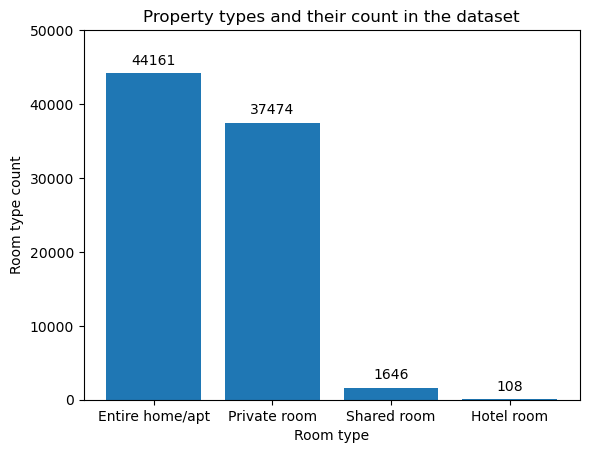

In [19]:
#  Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count'])
plt.bar_label(room_type_bar,labels= property_types.loc[:,'count'],padding= 4)
plt.ylim([0,50000])
plt.xlabel('Room type')
plt.ylabel('Room type count')
plt.title('Property types and their count in the dataset')

In [20]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34621
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816
brookln,1


Text(0.5, 1.0, 'Which neighbourhood group has the highest number of listings')

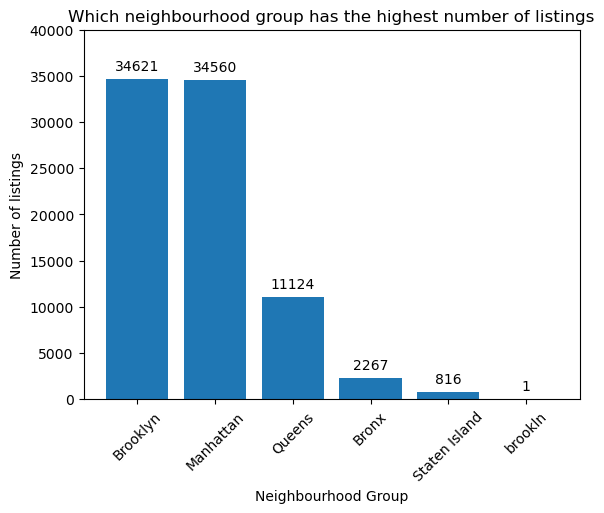

In [21]:
#  Which neighbourhood group has the highest number of listings
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar,labels= hood_group.loc[:,'count'],padding= 4)
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of listings')
plt.xticks(rotation = 45)
plt.title('Which neighbourhood group has the highest number of listings')

Text(0.5, 1.0, 'Average Price per listings ($)in each Neighbourhood Group')

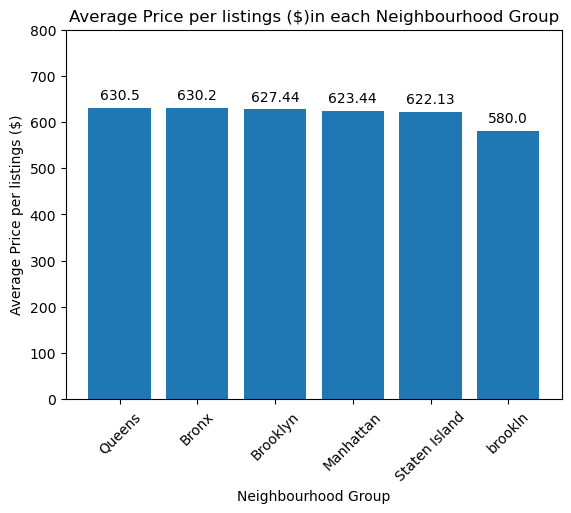

In [23]:
# Which neighbourhoods group have the highest average price for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending= False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$'])
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding= 4)
plt.ylim([0,800])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per listings ($)')
plt.xticks(rotation = 45)
plt.title('Average Price per listings ($)in each Neighbourhood Group')

Text(0.5, 1.0, 'Average Price $ for properties in each Construction year')

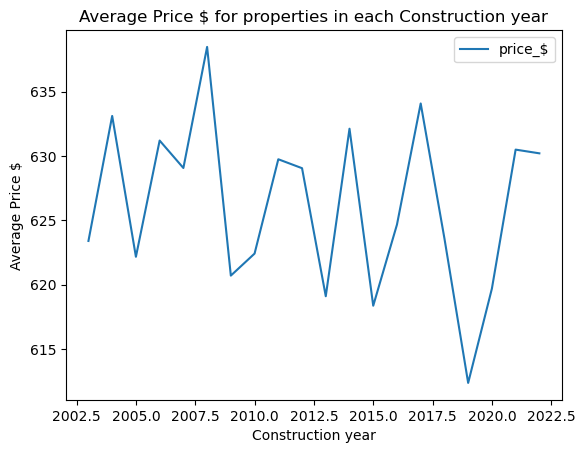

In [28]:
# Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction year')
plt.ylabel('Average Price $')
plt.title('Average Price $ for properties in each Construction year')

Text(0.5, 1.0, 'top 10 hosts by calculated host listings count')

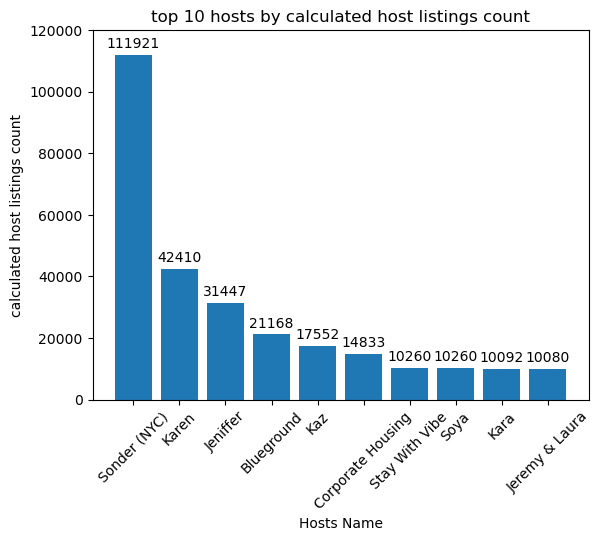

In [35]:
# Who are the top 10 hosts by calculated host listings count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending= False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar,label= hosts.loc[:,'calculated host listings count'], label_type='edge',padding=3)
plt.xlabel('Hosts Name')
plt.ylabel('calculated host listings count')
plt.xticks(rotation=45)
plt.ylim(0,120000)
plt.title('top 10 hosts by calculated host listings count')

In [37]:
# Are hosts with verified indentities more likely to recieve positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending= False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


Text(0.5, 1.0, 'Average review rate for each verification statistics')

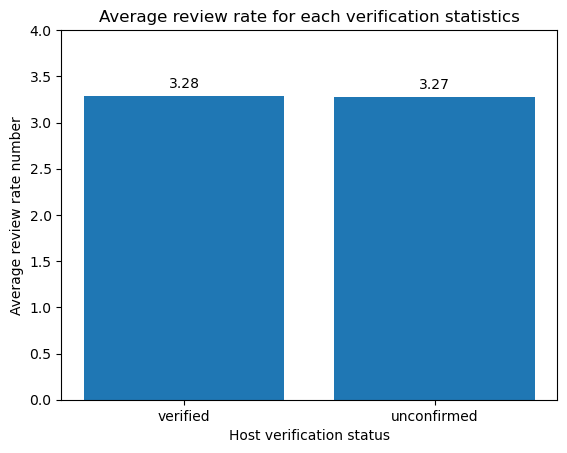

In [38]:
review_bar = plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4)
plt.ylim([0,4])
plt.xlabel('Host verification status')
plt.ylabel('Average review rate number')
plt.title('Average review rate for each verification statistics')

Text(0.5, 1.0, 'Average review rate for each verification status')

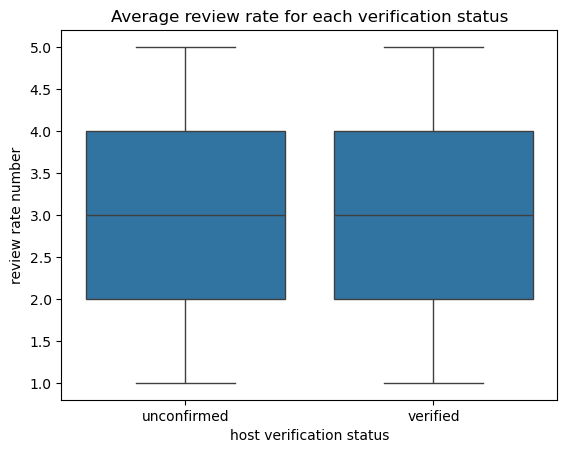

In [39]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color)
plt.xlabel('host verification status')
plt.ylabel('review rate number')
plt.title('Average review rate for each verification status')

In [40]:
# Is there a correlation between the price of a listings and its service fee
df['price_$'].corr(df['service_fee_$'])

0.9999909082976476

Text(0.5, 1.0, 'A regression plot showing the correlation of the price of listing and service fee')

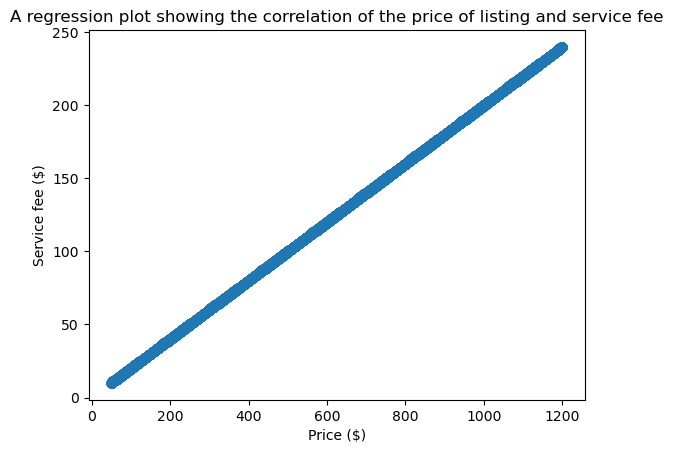

In [41]:
sns.regplot(df,x='price_$',y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service fee ($)')
plt.title('A regression plot showing the correlation of the price of listing and service fee')

In [42]:
APRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
APRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274728
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

Text(0.5, 1.0, 'Average review rate for each room/property type in each Neighbourhood group')

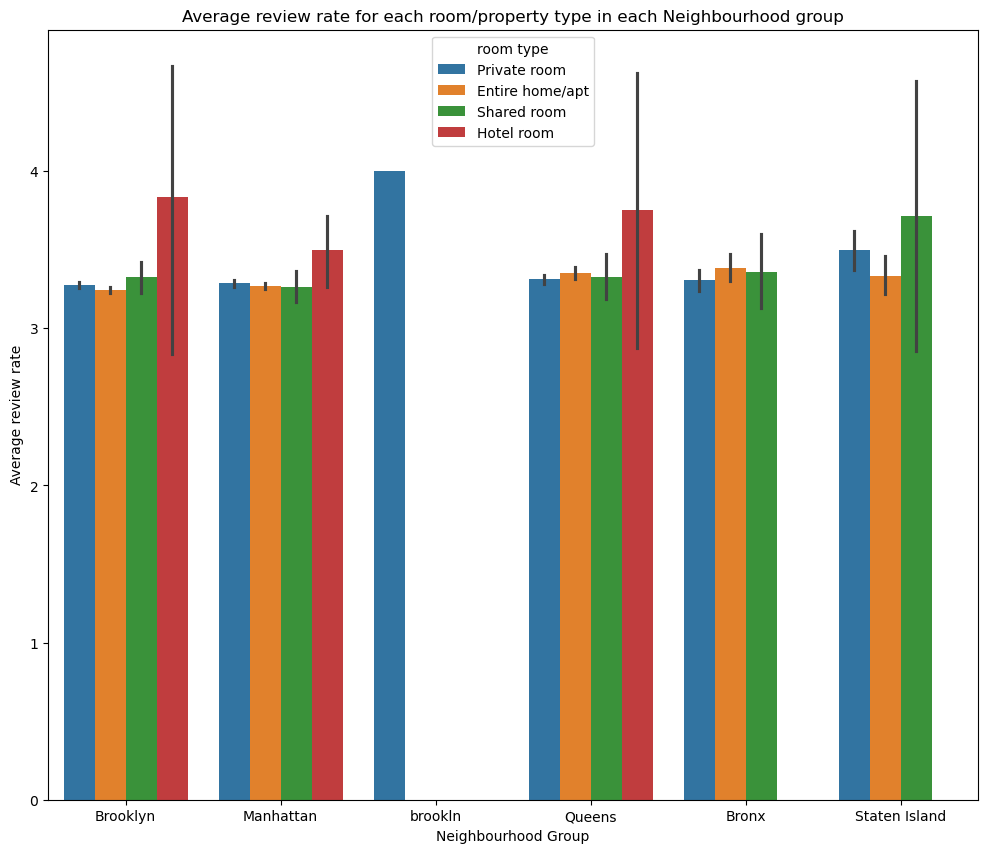

In [43]:
plt.figure(figsize=[12,10])
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average review rate')
plt.title('Average review rate for each room/property type in each Neighbourhood group')

Text(0.5, 1.0, 'A regression plot of the relationship between calaculated host listings count and availibility 365')

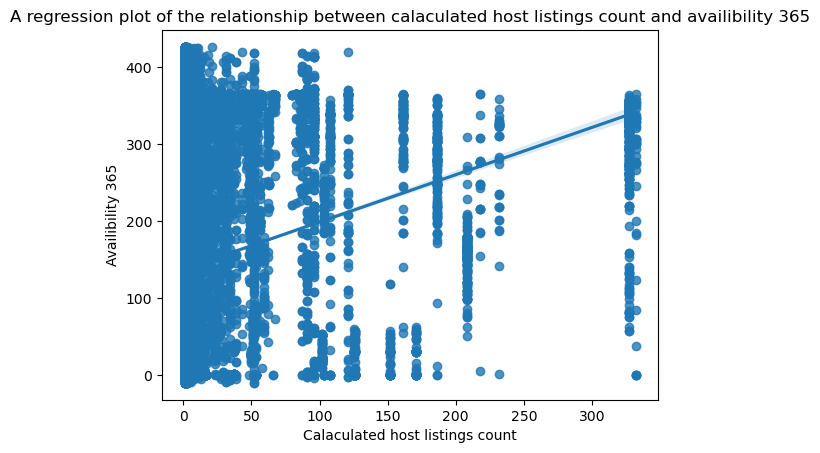

In [49]:
# Are hosts with a higher calaculated host listings count more likely to maintain higher availibility throghout the year
sns.regplot(df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calaculated host listings count')
plt.ylabel('Availibility 365')
plt.title('A regression plot of the relationship between calaculated host listings count and availibility 365')

In [50]:
df['calculated host listings count'].corr(df['availability 365'])

0.1359971471570338

The pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136,
indicating a weak positive correlation between the two variables.